In [24]:
import numpy as np #Question 1-4 3.2.1
from math import*
a = np.ones([4,4])
b = np.array([[2,2,2,2],[2,2,2,2],[2,2,2,2],[2,2,2,2]])
c = np.arange(16)

In [25]:
c=c.reshape(4,4) #Question 5

In [26]:
print(np.trace(a)) #Question 6
print(np.trace(b))
print(np.trace(c))

4.0
8
30


In [28]:
np.xeye(5) #Question 7, np.xeye(n) returns an n by n identity matrix

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

In [29]:
print(np.linalg.det(a)) #Question 8
print(np.linalg.det(b))
print(np.linalg.det(c))

0.0
0.0
-2.9582283945787796e-30


In [30]:
d = np.sqrt(c) #Question 9
np.linalg.inv(d)

array([[   -2.29896231,    39.20568698,   -85.50875537,    47.47086761],
       [    8.48561749,  -386.59691743,   930.91975911,  -536.89096609],
       [  -10.17146454,   679.39128656, -1689.16515249,   986.95082945],
       [    3.98314275,  -331.51882825,   841.73079812,  -495.86783399]])

In [31]:
np.linalg.eig(a) #Question 10

(array([0.00000000e+00, 4.00000000e+00, 0.00000000e+00, 2.80731443e-32]),
 array([[-0.8660254 , -0.5       , -0.8660254 , -0.64641535],
        [ 0.28867513, -0.5       ,  0.28867513, -0.32788993],
        [ 0.28867513, -0.5       ,  0.28867513,  0.48715264],
        [ 0.28867513, -0.5       ,  0.28867513,  0.48715264]]))

In [32]:
np.linalg.eig(b) #the eigenvectors of a and b are identical 
                 #but b's eigenvalues are double a's

(array([0.00000000e+00, 8.00000000e+00, 0.00000000e+00, 5.61462886e-32]),
 array([[-0.8660254 , -0.5       , -0.8660254 , -0.64641535],
        [ 0.28867513, -0.5       ,  0.28867513, -0.32788993],
        [ 0.28867513, -0.5       ,  0.28867513,  0.48715264],
        [ 0.28867513, -0.5       ,  0.28867513,  0.48715264]]))

In [33]:
q = np.loadtxt('numpy_test.txt') #Slicing arrays Question 1 3.2.2

In [34]:
np.shape(q) #Question 2

(10, 7)

In [35]:
q[3,2] #Question 3

12167.0

In [36]:
np.shape(q[2:6, 1:4]) #Question 4

(4, 3)

In [37]:
q[2:3, :3] #largest element is 4096 (Question 5)

array([[2744., 3375., 4096.]])

In [38]:
q[0::2,0] #Question 6

array([     0.,   2744.,  21952.,  74088., 175616.])

In [39]:
q[7:10,4:7] #Question 7

array([[148877., 157464., 166375.],
       [216000., 226981., 238328.],
       [300763., 314432., 328509.]])

In [40]:
def lagrange_poly(x,x_k,k): #3.2.3 Lagrange Interpolation Question 1
    lagrange_poly = 1
    for i in x_k:
        if i!= x_k[k-1]:
            lagrange_poly = lagrange_poly*((x-i)/(x_k[k-1]-i))
        if i==x_k[k-1]:
            lagrange_poly ==1
    return lagrange_poly

In [41]:
def interpolating_poly(x,x_k,f_k): #Question 2
    interpolating_poly = 0
    for i in range(len(f_k)): 
        interpolating_poly+= f_k[i]*lagrange_poly(x,x_k,i+1)
    return interpolating_poly

In [59]:
import matplotlib.pyplot as plt #Question 3
def plot_lagrange(x_k,f_k):
    plt.scatter(x_k,f_k)
    x = np.arange(min(x_k),max(x_k),10**-6)
    y = [interpolating_poly(i,x_k,f_k) for i in x]
    return plt.plot(x,y)

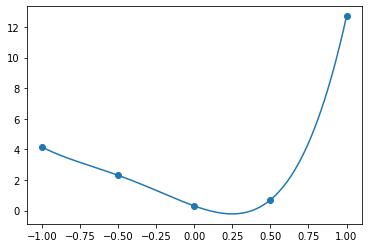

In [58]:
a = np.loadtxt('lagrange_data.txt') #Question 4
plot_lagrange(a[::1,0],a[::1,1])

In [ ]:
def Runge(n):                           # 3.2.3 Runge's problem Question 1
    x_runge = np.arange(-1,1+2/(n-1),2/(n-1))
    y_runge = [1/(1+25*i**2) for i in x_runge]
    plt.scatter(x_runge,y_runge)
    x = np.arange(-1,1,10**-6)
    y = [interpolating_poly(i,x_runge,y_runge) for i in x]
    a = np.arange(-1,1,10**-6)
    b = [1/(1+25*i**2) for i in a]
    plt.plot(x,y)
    plt.plot(a,b)

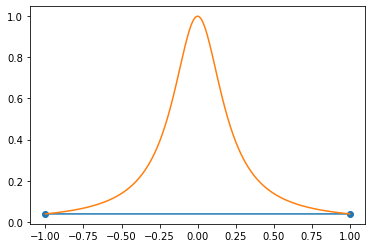

In [7]:
Runge(2)

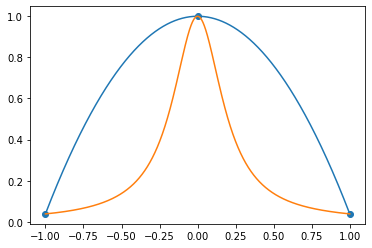

In [95]:
Runge(3)

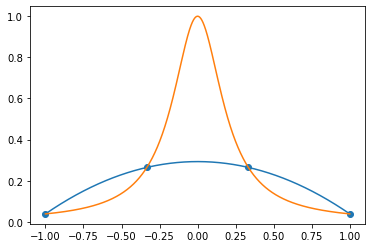

In [96]:
Runge(4)

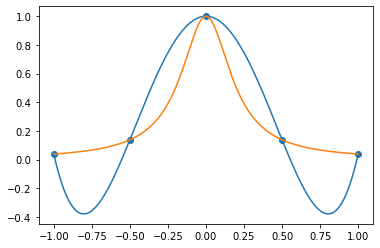

In [97]:
Runge(5)

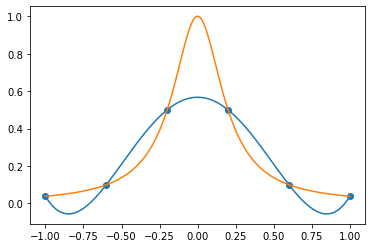

In [98]:
Runge(6)

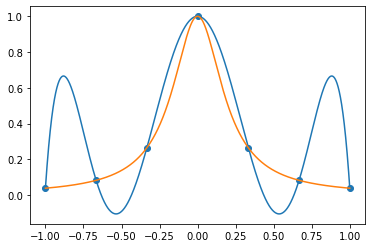

In [99]:
Runge(7)

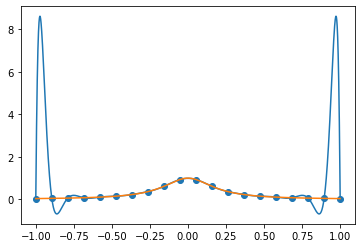

In [8]:
Runge(20) #Oscillations get more and more pronounced at the 
          #end points as n increases

In [123]:
import math as math     #3.2.5 Chebyshev nodes
def Chebyshev_nodes(n):
    Chebyshev_nodes_x = [math.cos(((2*k-1)/(2*n))*math.pi) for k in range(1,n+1)]
    Chebyshev_nodes_y = [1/(1+25*i**2) for i in Chebyshev_nodes_x]
    b = np.arange(min(Chebyshev_nodes_x),max(Chebyshev_nodes_x),10**-6)
    c = [interpolating_poly(i, Chebyshev_nodes_x, Chebyshev_nodes_y) for i in b]
    d = np.arange(-1,1+10**-6,10**-6)
    e = [1/(1+25*i**2) for i in d]
    plt.scatter(Chebyshev_nodes_x,Chebyshev_nodes_y)
    plt.plot(b,c)
    plt.plot(d,e)

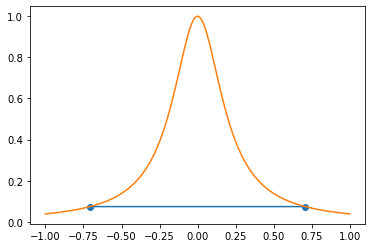

In [124]:
Chebyshev_nodes(2)

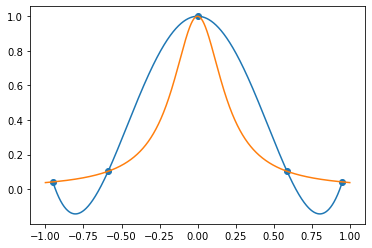

In [125]:
Chebyshev_nodes(5)

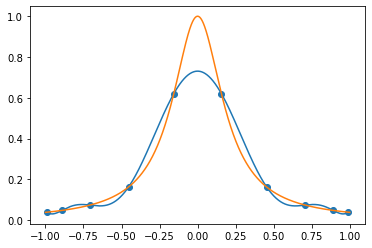

In [126]:
Chebyshev_nodes(10)

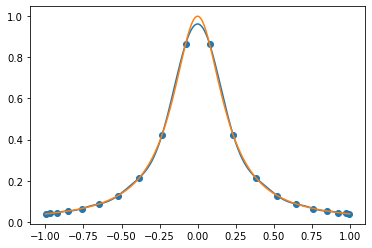

In [127]:
Chebyshev_nodes(20)

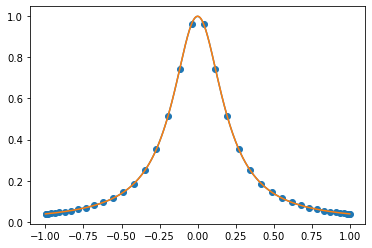

In [128]:
Chebyshev_nodes(40) #as the number of nodes increase the graph of f(x)
                    #is better and better approximated 